## Coursework

 ##  Let us have a look at a more interesting data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Linear Regression

In [2]:
N = 25
X = np.linspace(0,0.9,N).reshape(N,1)

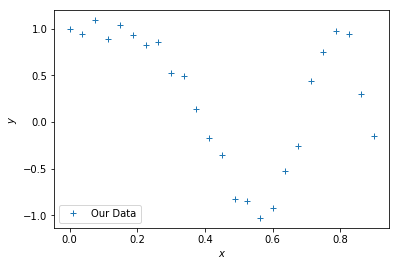

In [3]:
def f(x):   
    return np.cos(10*X**2) + 0.1*np.sin(100*X)


y = f(X)

plt.figure()
plt.plot(X, y, '+', label = 'Our Data')
plt.xlabel("$x$")
plt.ylabel("$y$");
plt.legend()

## A)

## For polynomial of degree K

In [4]:
def poly_features(X, K):
    
    #X: inputs of size N x 1
    #K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    Phi = np.zeros((N, K+1)) 
    for i in range(len(X)):
        for j in range(K+1):
            Phi[i,j] = X[i]**(j)  ## <-- EDIT THIS LINE
    return Phi

In [5]:
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    jitter = 0 # good for numerical stability
    
    K = Phi.shape[1]  
    
    # maximum likelihood estimate
    w_ml = np.zeros((K,1)) 
    w_ml = np.linalg.inv(Phi.T @ Phi + jitter * np.eye(K,K)) @ (Phi.T @ y)   ## <-- EDIT THIS LINE
  
    
    return w_ml

(-2, 5)

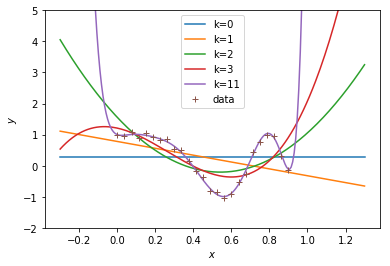

In [6]:
# test inputs
Xtest = np.linspace(-0.3,1.3,200).reshape(-1,1)
for k in [0,1,2,3,11]:


    #training part
    # k is the degree of the polynomial we wish to fit
    Phi = poly_features(X, k) # N x (K+1) feature matrix
    w_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator


    # testing part
    Phi_test = poly_features(Xtest, k) # N x (K+1) feature matrix
    mean_pred = Phi_test @ w_ml  # predicted y-values
    
    plt.plot(Xtest, mean_pred, label = 'k={}'.format(k))
    plt.xlabel("$x$")
    plt.ylabel("$y$")

plt.plot(X, y, '+', label='data')
plt.legend()
plt.ylim([-2,5])

## For trigonometric of degree K with unit frequency

In [7]:
def trigo_features(X, K):
    
    #X: inputs of size N x 1
    #K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, 2*K+1))
    
    # Compute the feature matrix in stages
    Phi = np.ones((N, 2*K+1)) 
    for i in range(len(X)):
        for j in range(1,K+1):
            Phi[i,2*j] = np.cos(2*np.pi*j*X[i])  ## <-- EDIT THIS LINE
            Phi[i,2*j-1] = np.sin(2*np.pi*j*X[i])  ## <-- EDIT THIS LINE 
    return Phi

(-3, 3)

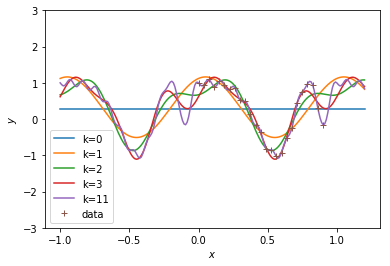

In [8]:
# test inputs
Xtest = np.linspace(-1,1.2,200).reshape(-1,1)
for k in [0,1,2,3,11]:


    #training part
    # k is the degree of the polynomial we wish to fit
    Phi = trigo_features(X, k) # N x (K+1) feature matrix
    w_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator


    # testing part
    Phi_test = trigo_features(Xtest, k) # N x (K+1) feature matrix
    mean_pred = Phi_test @ w_ml  # predicted y-values
    
    plt.plot(Xtest, mean_pred, label = 'k={}'.format(k))
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    
plt.plot(X, y, '+', label='data')
plt.legend()
plt.ylim([-3,3])
        

## b)

## repeat the previous part 

(-3, 3)

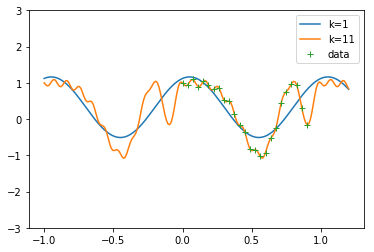

In [9]:
# test inputs
Xtest = np.linspace(-1,1.2,200).reshape(-1,1)
for k in [1,11]:


    #training part
    # k is the degree of the polynomial we wish to fit
    Phi = trigo_features(X, k) # N x (K+1) feature matrix
    w_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator


    # testing part
    Phi_test = trigo_features(Xtest, k) # N x (K+1) feature matrix
    mean_pred = Phi_test @ w_ml  # predicted y-values

    plt.plot(Xtest, mean_pred, label = 'k={}'.format(k))
    
plt.plot(X, y, '+', label='data')
plt.legend()
plt.ylim([-3,3])

In [10]:
def loss(y, ypred):
    rmse = sum((y - ypred)**2)/y.shape[0] ## <-- EDIT THIS LINE
    return rmse

In [11]:
# K_max = 10
# loss_train = np.zeros((K_max+1,))
# sigma = np.zeros((K_max+1,))

# for k in range(K_max+1):
    
#     Phi = poly_features(X, k)
#     w_ml = nonlinear_features_maximum_likelihood(Phi, y)
#     Phi_test = trigo_features(Xtest, k)
#     y_pred_train = Phi @ w_ml
    
    
#     #ypred_train = Phi @ theta_ml
     
#     loss_train[k] = loss(y, y_pred_train) # <-- EDIT THIS LINE
#     #sigma = y_pred/(X.shape[0]) 
#     #plt.plot(sigma)
        

# plt.figure()
# plt.plot(loss_train)

# plt.xlabel("degree of polynomial")
# plt.ylabel("RMSE");

In [12]:
def leave_one_out(X):
    data = list(X)
    result = []
    for i in range(len(data)):
        data.remove(data[i])
        result.append(np.array(data))
        data = list(X)
    return result        

In [13]:
# k=1
# N = X.shape[0]
# error = []
# errors = []

# for j in range(len(leave_one_out(X))):
#     #training part
#     # k is the degree of the polynomial we wish to fit
#     training_data = leave_one_out(X)[j]
#     test_data = leave_one_out(y)[j]

#     Phi = trigo_features(training_data, k) # N x (2K+1) feature matrix
#     w_ml = nonlinear_features_maximum_likelihood(Phi, test_data) # maximum likelihood estimator


#     # testing part
#     Phi_test = trigo_features(X[j], k) # N x (K+1) feature matrix
#     mean_pred = Phi_test @ w_ml  # predicted y-values
    
#     err = (y[j] - mean_pred)[0][0]

#     error.append(err*err )

# errors.append(sum(error)/N)


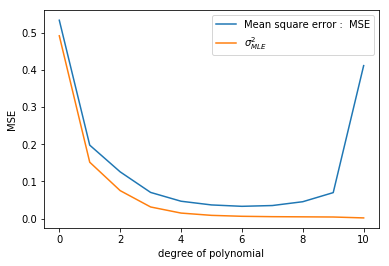

In [14]:
K_max = 10
loss_train = np.zeros((K_max+1,))
sigma = np.zeros((K_max+1,))
errors = []
Xtest = np.linspace(-1,1.2,25).reshape(-1,1)
ytest = f(Xtest)

for k in range(K_max+1):
    
    #train
    Phi = trigo_features(X, k)
    w_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    #test
    Phi_test = trigo_features(Xtest, k)
    #y_pred = Phi @ w_ml
    
    y_pred = Phi @ w_ml
    # prediction (test set)
    #ypred_test = Phi_test @ w_ml
     
    loss_train[k] = loss(y, y_pred) # <-- EDIT THIS LINE
    
    ###########################################################
    
    N = X.shape[0]
    error = []
    

    for j in range(len(leave_one_out(X))):
        #training part
        # k is the degree of the polynomial we wish to fit
        training_data = leave_one_out(X)[j]
        test_data = leave_one_out(y)[j]

        Phi = trigo_features(training_data, k) # N x (2K+1) feature matrix
        w_ml = nonlinear_features_maximum_likelihood(Phi, test_data) # maximum likelihood estimator


        # testing part
        Phi_test = trigo_features(X[j], k) # N x (K+1) feature matrix
        mean_pred = Phi_test @ w_ml  # predicted y-values

        err = (y[j] - mean_pred)[0][0]

        error.append(err*err )

    errors.append(sum(error)/N)
    

errors = np.array(errors)

plt.figure()
plt.plot(errors)
plt.plot(loss_train)
plt.xlabel("degree of polynomial")
plt.ylabel("MSE")
plt.legend(["Mean square error :  MSE", "$\sigma^2_{MLE}$"]);

In [15]:
# K_max = 10
# loss_train = np.zeros((K_max+1,))
# loss_test = np.zeros((K_max+1,))
# sigma = np.zeros((K_max+1,))
# errors = []
# Xtest = np.linspace(-1,1.2,25).reshape(-1,1)
# ytest = f(Xtest)

# for k in range(K_max+1):
    
#     #train
#     Phi = trigo_features(X, k)
#     w_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
#     #test
#     Phi_test = trigo_features(Xtest, k)
#     #w_ml_test = nonlinear_features_maximum_likelihood(Phi_test, y)
#     #y_pred = Phi @ w_ml
    
#     y_pred = Phi @ w_ml
#     # prediction (test set)
    
    
    
#     # prediction (test set)
#     ytest_predict = Phi_test @ w_ml ## <--- EDIT THIS LINE
    
#     # RMSE on test set
#     loss_test[k] = loss(ytest, ytest_predict) ## <--- EDIT THIS LINE
    
#     #ypred_test = Phi_test @ w_ml
     
#     loss_train[k] = loss(y, y_pred) # <-- EDIT THIS LINE
    
#     ###########################################################
    
#     N = X.shape[0]
#     error = []
    

#     for j in range(len(leave_one_out(X))):
#         #training part
#         # k is the degree of the polynomial we wish to fit
#         training_data = leave_one_out(X)[j]
#         test_data = leave_one_out(y)[j]

#         Phi = trigo_features(training_data, k) # N x (2K+1) feature matrix
#         w_ml = nonlinear_features_maximum_likelihood(Phi, test_data) # maximum likelihood estimator


#         # testing part
#         Phi_test = trigo_features(X[j], k) # N x (K+1) feature matrix
#         mean_pred = Phi_test @ w_ml  # predicted y-values

#         err = (y[j] - mean_pred)[0][0]

#         error.append(err*err )

#     errors.append(sum(error)/N)
    

# errors = np.array(errors)

# plt.figure()
# plt.plot(errors)
# plt.plot(loss_train)
# plt.plot(loss_test)
# plt.xlabel("degree of polynomial")
# plt.ylabel("MSE")
# plt.legend(["Mean square error :  MSE", "loss train", "loss test"]);

In [16]:
def Gaussian_features(X, K):
    
    #X: inputs of size N x 1
    #K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    mu = np.linspace(0,1,K+1).reshape(-1,1)
    scale = 0.1

    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    for i in range(len(X)):
        for j in range(K+1):
            Phi[i,j] = np.exp(-((X[i] - mu[j])**2)/(2*(scale**2)))  ## <-- EDIT THIS LINE
    return Phi

In [17]:
def loss_function(w_map, lamda):
    value = np.linalg.norm(y - (Phi @ w_map))**2 + lamda*(np.linalg.norm(w_map)**2) 
    return value

In [18]:
def nonlinear_features_maximum_a_posteriori(Phi, y, lamda):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    
    #jitter = 0 # good for numerical stability
    
    K = Phi.shape[1]  
    
    # maximum likelihood estimate
    w_ml = np.zeros((K,1)) 
    w_ml = np.linalg.inv(Phi.T @ Phi + lamda * np.eye(K,K)) @ (Phi.T @ y)   ## <-- EDIT THIS LINE
  
    
    return w_ml

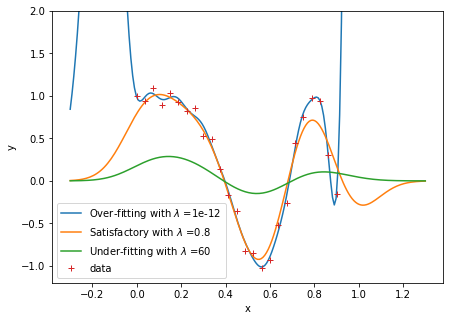

In [19]:
#lamdas = np.random.rand(3)
lamdas = [1e-12, 0.8, 60]
words = ["Over-fitting", "Satisfactory", "Under-fitting"]
Xtest = np.linspace(-0.3,1.3,200).reshape(-1,1)

plt.figure(figsize=(7,5))
for i,lamda in enumerate(lamdas) :

    K = 20
    rsf = np.zeros(K+1)
    #for k in range(K):
    Phi = Gaussian_features(X, K)
    w_map = nonlinear_features_maximum_a_posteriori(Phi, y, lamda)
    Phi_test = Gaussian_features(Xtest, K)
    y_pred = Phi_test @ w_map
    
    word = words[i]
    plt.plot(Xtest, y_pred, label = word +' with $\lambda$ ={}'.format(lamda))
    #i+=1

plt.plot(X,y, '+', label='data')       
plt.legend()    
plt.ylim([-1.2,2])
plt.xlabel(r"x")
plt.ylabel(r"y")

In [21]:
# #lamdas = np.random.rand(3)
# lamdas = [0.4, 1, 9]

# for lamda in lamdas :

#     K = 20
#     rsf = np.zeros(K+1)
#     for k in range(K):
#         Phi = Gaussian_features(X, k)
#         w_map = nonlinear_features_maximum_a_posteriori(Phi, y, lamda)
#         rsf[k] = loss_function(w_map, lamda)

#     #rsf = np.array(rsf)
#     #print(rsf.shape)
#     plt.figure()
#     plt.plot(rsf)
#     plt.xlabel("w")
#     #plt.ylabel("")
#     plt.legend(["$\lambda$ = {}".format(lamda)]);

## 3) Bayesian Linear Regression

In [22]:
def lml(alpha, beta, Phi, Y):
    
    N = Y.shape[0]
    A = alpha * (Phi @ Phi.T) + beta*np.eye(N)
    lml = (-N * np.log(2*np.pi) - np.log(abs(np.linalg.det(A))) - Y.T @ (np.linalg.inv(A+ 1e-08*np.eye(A.shape[0])) @ Y))/2
                                           
    return lml

In [23]:
# randomly initialize a value to x
N = 25
X = np.linspace(0,0.9,N).reshape(N,1)
Y = f(X)

Phi = poly_features(X, 1)
lml(0.1, 0.1, Phi, Y)

array([[-52.33139732]])

In [24]:
def grad_lml(alpha, beta, Phi, Y):
    
    N = Y.shape[0]
    A = alpha * (Phi @ Phi.T) + beta*np.eye(N)
    
    alpha_grad = (Y.T @ (np.linalg.inv(A) @ Phi @ Phi.T @ np.linalg.inv(A) @ Y) - np.trace(np.linalg.inv(A) @ Phi @ Phi.T))/2
    beta_grad = (Y.T @ (np.linalg.inv(A) @ np.linalg.inv(A)) @ Y - np.trace(np.linalg.inv(A)))/2
    
    return (alpha_grad, beta_grad)

In [25]:
grad_lml(0.1, 0.1, Phi, Y)

(array([[26.57558498]]), array([[408.00548318]]))

In [39]:
# set up a stepsize
learning_rate = 0.01

# randomly initialize a value to X
N = 25
X = np.linspace(0,0.9,N).reshape(N,1)
Y = f(X)

Phi = poly_features(X, 1)

np.random.seed(4)

previous_alpha = np.random.rand(1)
previous_beta = np.random.rand(1)

# set up a number of iteration
epoch = 1000


In [42]:
def gradient_descend(previous_alpha, previous_beta, learning_rate, epoch):
    

    # define the objective function f(alpha, beta) = lml(alpha, beta, Phi, Y)

    # define the gradient of lml : grad_lml(alpha, beta, Phi, Y)
    
    iters = 0
    previous_step_size = 1 
    precision = 0.00001

    
    # randomly initialize values
    
    Alpha = np.zeros(epoch)
    Beta = np.zeros(epoch)
    #log_marg_lik = []
    log_marg_lik = np.zeros(epoch).astype('float')#np.array([0 for i in range(counter)],dtype=float)
    
    #Alpha[0] = previous_alpha
    #Beta[0] = previous_beta
    
    # gradient descent method to find the minimum
    while (previous_step_size > precision) & (iters < epoch):
    #for i in range(epoch-1):
        grad = grad_lml(previous_alpha, previous_beta, Phi, Y)
        current_alpha = previous_alpha + learning_rate*grad[0]
        current_beta = previous_beta + learning_rate*grad[1]
        Alpha[iters] = current_alpha
        Beta[iters] = current_beta
        
        
        previous_step = max(abs(current_alpha- previous_alpha), abs(current_beta-previous_beta))
        # update previous_x and previous_y
        previous_alpha = current_alpha
        previous_beta = current_beta
        
        iters += 1
        
    
    #print(Alpha)
    
    
    for i in range(epoch):
        log_marg_lik[i] = lml(Alpha[i], Beta[i], Phi, Y)[0][0]
        
    
    alpha_max =  Alpha[log_marg_lik.argmax()]
    beta_max = Beta[log_marg_lik.argmax()]
    
    #print(alpha_max, beta_max)

#     plt.figure()
#     plt.plot(log_marg_lik)
#     plt.xlabel("Number of iterations")
#     plt.ylabel("y")#'''
#     #plt.legend(["$\theta$"])
        
    
    
    #return (alpha_max, beta_max)
    return (Alpha, Beta, log_marg_lik)

In [41]:
Alpha, Beta, log_marg_lik = gradient_descend(previous_alpha, previous_beta, learning_rate, epoch)

0.4245549972256691 0.4492313296405098


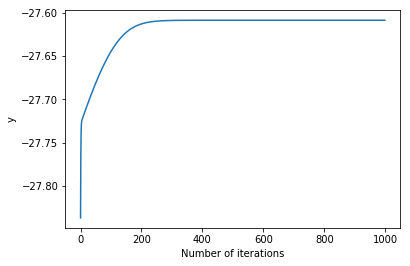

In [29]:
#log_marg_lik = np.zeros(epoch).astype('float')
# for i in range(epoch):
#     log_marg_lik[i] = lml(Alpha[i], Beta[i], Phi, Y)[0][0]

plt.figure()
plt.plot(log_marg_lik)
plt.xlabel("Number of iterations")
plt.ylabel("y")

In [30]:
import matplotlib.pyplot as plt

from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


In [31]:
np.random.seed(4)
# randomly initialize values
alpha = 1
beta = 1
learning_rate = 0.01
epoch = 500
alpha_gd, beta_gd,_ = gradient_descend(alpha, beta, learning_rate, epoch)

In [33]:
# alpha_max =  alpha_gd[np.array(lml_gd).argmax()]
# beta_max = beta_gd[np.array(lml_gd).argmax()]
# print(alpha_max, beta_max)

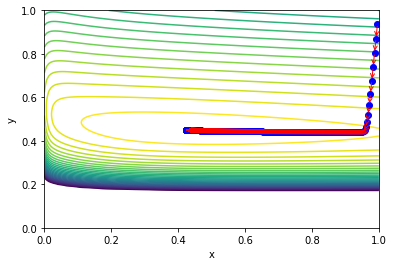

In [38]:
''' Plot our function '''
N = 150
a = np.linspace(0.001,1,N).reshape(N,1)
b = np.linspace(0.001,1,N).reshape(N,1)

x, y = np.meshgrid(a, b)

z = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        z[i,j] = max(lml(x[i,j], y[i,j], Phi, Y), -35)


fig1, ax1 = plt.subplots()

ax1.contour(x, y, z, 30)

# Plot target (the minimum of the function)
ax1.set_xlabel(r'x')
ax1.set_ylabel(r'y')


#%matplotlib inline
alpha_gd = np.array(alpha_gd)
beta_gd = np.array(beta_gd)


ax1.plot(alpha_gd, beta_gd, 'bo')

#plt.figure(figsize=(10,8))

for i in range(1, epoch):
    ax1.annotate('', xy=(alpha_gd[i], beta_gd[i]), xytext=(alpha_gd[i-1], beta_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')


plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [ ]:
## alpha_gd, beta_gd, lml_gd = gradient_decent(alpha, beta, learning_rate, epoch)

## C)

In [46]:
# set up a stepsize
learning_rate = 1e-5

# randomly initialize a value to X
N = 25
X = np.linspace(0,0.9,N).reshape(N,1)
Y = f(X)

Phi = poly_features(X, 1)

np.random.seed(4)

previous_alpha = np.random.rand(1)
previous_beta = np.random.rand(1)

# set up a number of iteration
ite = 100000

In [47]:
Kmax = 11
max_values = []
#learning_rate = 1e-7
for i in range(Kmax+1):
    Phi = trigo_features(X, i)
    alpha_max, beta_max, b= gradient_descend(previous_alpha, previous_beta, learning_rate, ite)
    #max_values.append(lml(alpha_max, beta_max, Phi, Y)[0][0])
    max_values.append(max(b))

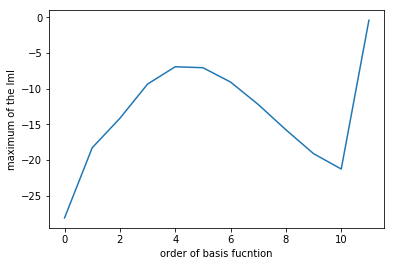

In [48]:
max_values = np.array(max_values)
orders = np.array([order for order in range(Kmax+1)])
plt.figure()
plt.plot(orders, max_values)
plt.xlabel("order of basis fucntion")
plt.ylabel("maximum of the lml")

In [49]:
Phi = trigo_features(X, 2)
alpha_max, beta_max = gradient_descend(previous_alpha, previous_beta, learning_rate, epoch)
print(lml(alpha_max, beta_max, Phi, Y)[0][0])

ValueError: too many values to unpack (expected 2)

In [50]:
def Gaussian_features(X, K):
    
    #X: inputs of size N x 1
    #K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    mu = np.linspace(-0.5,1,10).reshape(10,1)
    scale = 0.1

    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages
    for i in range(len(X)):
        for j in range(K+1):
            Phi[i,j] = np.exp(-((X[i] - mu[j-1])**2)/(2*(scale**2)))  ## <-- EDIT THIS LINE
    return Phi

In [51]:
K =10
alpha = 1
beta = 0.1
Phi = Gaussian_features(X,K)
# N = 25
variance = np.linalg.inv(1/alpha*np.identity(11) + 1/beta*Phi.T @ Phi)
mean = variance @ (1/beta* Phi.T @ y).flatten()
sample = np.random.multivariate_normal(mean,variance, size=5)

Phi_test = Gaussian_features(Xtest, K)
for i in range(5):
    y_pred = Phi_test @ sample[i]
    plt.plot(Xtest, y_pred)
    


# plot the posterior
# plt.figure()
# plt.plot(X, y, "+")
# plt.plot(Xtest, m_mle_test)
# plt.plot(Xtest, m_map_test)
mean_blr = Phi_test @ mean
cov_blr = Phi_test @ variance @ Phi_test.T
var_blr = np.diag(cov_blr)
conf_bound1 = np.sqrt(var_blr).flatten()
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
conf_bound3 = 2.0*np.sqrt(var_blr).flatten() + 2.0*beta

plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound1, 
                 mean_blr.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound2, 
                 mean_blr.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr.flatten() + conf_bound3, 
                 mean_blr.flatten() - conf_bound3, alpha = 0.1, color="k")
plt.legend(["Training data", "MLE", "MAP", "BLR"])
plt.xlabel('$x$');
plt.ylabel('$y$');

ValueError: shapes (11,25) and (150,150) not aligned: 25 (dim 1) != 150 (dim 0)

In [ ]:
def gradient_decent(previous_alpha, previous_beta, learning_rate, epoch):
    alpha_gd = []
    beta_gd = []
    lml_gd = []
    
    # randomly initialize a value to X
    N = 25
    X = np.linspace(0,0.9,N).reshape(N,1)
    Y = f(X)
    
    Phi = poly_features(X, 1)

    alpha_gd.append(previous_alpha[0])
    beta_gd.append(previous_beta[0])
    lml_gd.append(lml(previous_alpha, previous_beta, Phi, Y))

    # begin the loops to update x, y and z
    for i in range(epoch):
        grad = grad_lml(previous_alpha, previous_beta, Phi, Y)
        
        current_alpha = previous_alpha - learning_rate*grad[0]
        alpha_gd.append(current_alpha[0][0])
        
        current_beta = previous_beta - learning_rate*grad[1]
        beta_gd.append(current_beta[0][0])
        

        lml_gd.append(lml(current_alpha, current_beta, Phi, Y))

        # update previous_x and previous_y
        previous_alpha = current_alpha
        previous_beta = current_beta

    return alpha_gd, beta_gd, lml_gd
